In [1]:
# Import API key
# from config import api_key

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests


# input File (CSV)
input_data_file = "ViolentCrime2017.csv"


## Generate Cities List

In [2]:
city_df = pd.read_csv(input_data_file)
city_df.head()

,State,City,Population,Violent crime,Property crime,Violent Crime per pop,"Violent crime rate per 100,000 inhabitants",Property crime per pop,"Property crime per 100,000 inhabitants"
0,Pennsylvania,Erie,"98,887",176,959,0,177.98,0.01,969.79
1,Washington,Renton,"100,015",148,"2,921",0,147.98,0.03,2920.56
2,Wisconsin,Kenosha,"100,038",141,"1,042",0,140.95,0.01,1041.6
3,Florida,Davie,100612,97,1431,0,96.41,0.01,1422.3
4,New Jersey,Woodbridge Township,100950,51,802,0,50.52,0.01,794.45


In [9]:
baseurl = "https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/tables/table-8/table-8-state-cuts/"

testurl = "https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/tables/table-8/table-8-state-cuts/alabama.xls"
response = requests.get(testurl)
response

# weather_list = []

# record_id = 0
# set_id = 1

# for city in cities:  
    
#     if record_id<49:
#         record_id += 1
#     else: 
#         record_id = 0
#         set_id += 1
    
#     print(f"Processing Record {record_id} of Set {set_id} | {city}.")
#     params = {"units": "imperial", 
#               "appid": api_key,
#               "q":city}
#     try:
#         response = requests.get(baseurl,params=params)
#         if response.status_code == requests.codes.ok:
#             weather_list.append(response.json())
#         else:
#             print("City not found. Skipping...")
#     except:
#         print("Unknown exception...")
#         pass
    
        
# print("-----------------------------")
# print("Data Retrieval Complete")      
# print("-----------------------------")

<Response [200]>

In [53]:
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
maxtemp_list = []
windspeed_list = []

for weather in weather_list:
    city_list.append(weather['name'])
    cloud_list.append(weather['clouds']['all'])
    country_list.append(weather['sys']['country'])
    date_list.append(weather['dt'])
    humidity_list.append(weather['main']['humidity'])
    lat_list.append(weather['coord']['lat'])
    lng_list.append(weather['coord']['lon'])
    maxtemp_list.append(weather['main']['temp_max'])
    windspeed_list.append(weather['wind']['speed'])
    
weather_df = pd.DataFrame({"City":city_list,
                           "Cloudiness":cloud_list,
                           "Country":country_list,
                           "Date":date_list,
                           "Humidity":humidity_list,
                           "Lat":lat_list,
                           "Lng":lng_list,
                           "Max Temp":maxtemp_list,
                           "Wind Speed":windspeed_list})
weather_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [54]:
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Blair,0,IN,1553302796,100,11.67,92.75,81.98,8.19
1,Aiquile,88,BO,1553302796,86,-18.20,-65.18,57.50,2.71
2,Dalby,12,AU,1553302233,65,-27.18,151.26,88.00,6.93
3,Port Alfred,44,ZA,1553302541,95,-33.59,26.89,66.99,11.99
4,Humaita,90,AR,1553299200,82,-24.93,-65.37,62.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (03/23/19)')

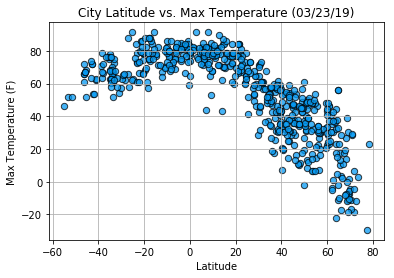

In [55]:
ts = time.gmtime()
today_date = time.strftime("%x", ts)
chart1 = plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({today_date})")